# Author :- Muhammad Arslan


# Task 1: Predictio  Using Supervised ML

In [11]:
# Importing Required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Reading data from given link

dataset_link = "http://bit.ly/w-data"
data_frame = pd.read_csv(dataset_link)
data_frame.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis 

In [3]:
data_frame.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data_frame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
X= data_frame.iloc[:,:-1].values
Y= data_frame.iloc[:,1].values

# Visualizing our Data on A Scatter Plot

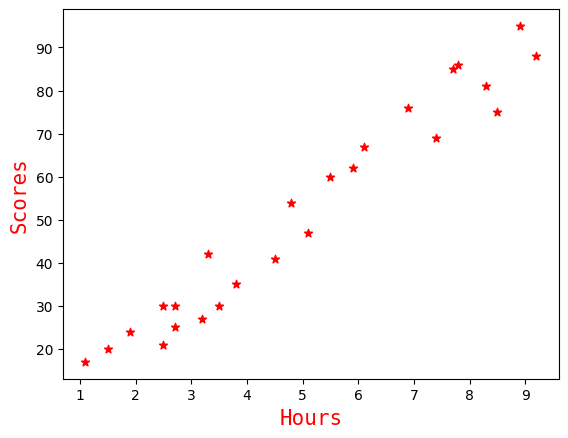

In [14]:
plt.scatter(data_frame['Hours'],data_frame['Scores'],marker='*',c = 'red')

font_size = {'family':'monospace','color':'r','size':15}

plt.xlabel('Hours',font_size)
plt.ylabel('Scores',font_size)
plt.show()

# Spliting Data Using Sklearn Test train split Function

# Apply Linear Regression Model Form sklearn 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)  #Fit the data to our model for training

LinearRegression()

# Check the model accuracy 

In [13]:
linear_model.score(x_test,y_test)

0.9454906892105354

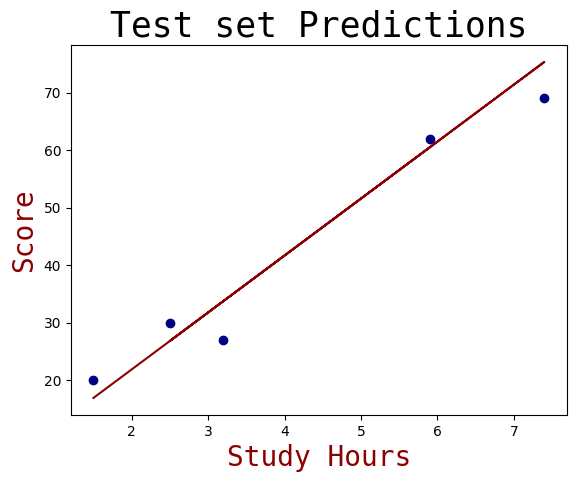

In [15]:
plt.scatter(x_test,y_test,color='navy')
plt.plot(x_test,linear_model.predict(x_test),color='darkred')

font1 = {'family':'monospace','color':'k','size':25}
font2 = {'family':'monospace','color':'darkred','size':20}

plt.title('Test set Predictions',font1)
plt.xlabel('Study Hours',font2)
plt.ylabel('Score',font2)
plt.show()

#Predicting Testset  Values

In [17]:
y_pred= linear_model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparision B/W Actual and Predicted Values

In [18]:
actual_pred=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_pred

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicted score if a student studies for 9.25 hrs/ day

In [19]:
studen_std_rate=9.25
pred_studen_std_rate=linear_model.predict([[studen_std_rate]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(studen_std_rate,pred_studen_std_rate))

If a student studies for 9.25 hours per day he/she will score [93.69173249] % in exam.


In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean absolute Error: 4.183859899002982
R2 score: 0.9454906892105354
